# Decision Trees
Goal: To classify emails as spam and ham

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import pydotplus
from IPython.display import Image, SVG
from sklearn.tree import export_graphviz
import os

## Phase 1— Project setup & problem definition

**Goal:** make sure the problem, data, and environment are clear so we don’t get stuck later.

Do the following (one-by-one). After each step, tell me what you did and paste any small outputs I asked for (I’ll tell you exactly what to copy). I’ll verify and then unlock Phase 2.

Steps — do these in order

1. Pick the task & goal

Decide whether you want a classification or regression Decision Tree project (example tasks: classify emails as spam/not-spam; predict house price).

2. Choose your dataset

Pick a dataset you’ll work with (public dataset like UCI, Kaggle, or one you have). Note the source and file name.

3. Load the dataset.

4. Define target and feature set

**Confirm:**

* Do you have enough samples for the task? (rule of thumb: at least a few hundred for basic trees; but smaller can work — tell me the number)

* Is the target imbalanced? If yes, note the imbalance ratio.

* Any obvious data issues (lots of missing, strings where numbers expected)?

In [4]:
df = pd.read_csv("spambase.data")
print("Shape:", df.shape)
df.head()

Shape: (4600, 58)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


Above DataFrame shows that its does not have proper column names. So we need to properly assign them.

In [5]:
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
    'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
    'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total',
    'label'
]

df.columns = column_names
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [6]:
print("Dataset: UCI Spambase")
print("Shape:", df.shape)

print("\nFirst five rows:")
print(df.head().to_string(index=False))

print("\nDtypes:")
print(df.dtypes)

print("\nClass Distribution:")
print(df['label'].value_counts())

print("\nMissing values:")
print(df.isna().sum())

Dataset: UCI Spambase
Shape: (4600, 58)

First five rows:
 word_freq_make  word_freq_address  word_freq_all  word_freq_3d  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  word_freq_business  word_freq_email  word_freq_you  word_freq_credit  word_freq_your  word_freq_font  word_freq_000  word_freq_money  word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  word_freq_lab  word_freq_labs  word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  word_freq_original  word_freq_project  word_freq_re  word_freq_edu  word_freq_table  word_freq_conference  char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  capital_run_length_average  capital_run_length_longest  c

That marks the end of Phase 1.
1. Dataset loaded correctly
* Spambase has 4600 × 58 → matches the official dataset (4601 originally, but some distributions use 4600).
* No missing values → perfect.
* All features are numeric → ideal for Decision Trees (no encoding needed).

2. Target column identified
* label
* Spam = 1, Ham = 0
* Class distribution: 2788 ham / 1812 spam → mild imbalance but nothing serious.

3. Data quality
* No missing values
* No categorical columns
* No preprocessing complications

Perfect dataset for a clean Decision Tree workflow.

## Phase 2 — Split Data + Build Baseline Model

**Goal of Phase 2:**
1. Create training/testing split
2. Train a baseline Decision Tree (no tuning yet)
3. Evaluate accuracy → understand how a raw tree behaves

This phase is about establishing a baseline, not perfection.

### Step 1: Define Feature Matrix and Labels

In [7]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [8]:
# From inspecting our DataFrame it is known that
# the label column is the only column which is not a feature.
X = df.drop(columns="label", axis=1)

# Obviously the 'label' column is the our target
y = df.label

### Step 2: Train-Test Split

In [9]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**stratify=y keeps spam/ham ratio consistent across training & test**

### Step 3: Train a Baseline DecisionTreeClassifier

In [10]:
# from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Step 4: Evaluate Baseline

In [11]:
# from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n:", confusion_matrix(y_test, preds))

Accuracy: 0.9097826086956522
Confusion Matrix:
: [[508  50]
 [ 33 329]]


**Accuracy: 0.9098 (≈ 91%)**

This is a strong baseline, but there is almost certainly overfitting, because a raw decision tree grows deep and memorizes the data.

## Phase 3 — Diagnose the Baseline Model (Understanding Its Behavior)

This phase is not about coding — it's about learning why your baseline performed the way it did, and what to fix before tuning.

Think of Phase 3 like a medical checkup of your model.

You already have:

Accuracy: 0.9097 ≈ 90%

Confusion Matrix:

[[508 50]

 [ 33 329]]


### Step 1 — Interpret the Confusion Matrix

Assuming:
* 0 = ham
* 1 = spam

Your matrix means:
|                     | Predicted Ham | Predicted Spam |
| ------------------- | ------------- | -------------- |
| **Actual Ham (0)**  | TN = 508      | FP = 50        |
| **Actual Spam (1)** | FN = 33       | TP = 329       |

**What the model is good at:**
* Correctly identifies majority of spam (329)
* Correctly identifies most ham (508)
* This is a strong baseline.

**What the model struggles with:**
* 50 false positives → ham marked as spam
* 33 false negatives → spam marked as ham
* False negatives can be serious in spam filters (missing actual spam).

This is exactly why **Decision Trees must be pruned** — raw trees overfit.

### Step 2: Overfitting Check

In [12]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

Train Accuracy: 0.9997282608695652
Test Accuracy: 0.9097826086956522


Your model is showing the classic signature of an overfitted Decision Tree:

* **Train Accuracy: 99.97%** → almost perfect

* **Test Accuracy: 90.97%** → much lower

This confirms the tree memorised the training data instead of learning general patterns.

### Step 3: Precision, Recall, F1 (Real-World Spam Metrics)

In spam detection:

* **Recall (for spam)** matters a lot → catch as many spam emails as possible

* **Precision (for spam)** also matters → don’t classify genuine emails as spam

* **F1** balances the two

Let's calculate them.

In [13]:
# from sklearn.metrics import classification_report

print(classification_report(y_test, preds, target_names=["ham", "spam"]))

              precision    recall  f1-score   support

         ham       0.94      0.91      0.92       558
        spam       0.87      0.91      0.89       362

    accuracy                           0.91       920
   macro avg       0.90      0.91      0.91       920
weighted avg       0.91      0.91      0.91       920



**PHASE 3 — Final Diagnosis**

1. Precision / Recall for HAM

* Precision: 0.94 → when the model says “ham”, it is correct 94% of the time
* Recall: 0.91 → it catches 91% of actual ham

2. Precision / Recall for SPAM

* Precision: 0.87 → when it predicts “spam”, 13% of them are actually ham

* Recall: 0.91 → it catches 91% of actual spam

3. What this means

Your model is:

* very good at catching spam (high recall)

* pretty good at reducing false alarms (precision)

* but still making a noticeable number of:

  * false positives (ham → spam)

  * false negatives (spam → ham)

This performance is typical of an overgrown, unpruned Decision Tree.

We now have a perfect baseline.

## Phase 4— Pruning & Hyperparameter Tuning

In this phase, we will shrink the tree to reduce overfitting and increase generalization.

We’ll tune:

**🌿 The most important tree parameters:**
1. **max_depth**
2. **min_samples_split**
3. **min_samples_leaf**
4. **max_features**
5. **criterion** (gini vs entropy)

But before tuning everything at once, we will do it the right way:

* **Start with a Depth Sweep**
* Check effect on training vs testing accuracy
* Find the “sweet spot” model size
* Only then use *GridSearchCV* for fine-tuning

Think of this like sculpting — we shape the tree gradually.

### Step 1 - Controlling Tee Depth (max_depth)

In [14]:
train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
  test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

for d, tr, te in zip(depths, train_scores, test_scores):
  print(f"Depth={d:2d} | Train Accuracy={tr:.4f} | Test Accuracy={te:.4f}")

Depth= 1 | Train Accuracy=0.7967 | Test Accuracy=0.7859
Depth= 2 | Train Accuracy=0.8685 | Test Accuracy=0.8587
Depth= 3 | Train Accuracy=0.8976 | Test Accuracy=0.8880
Depth= 4 | Train Accuracy=0.9111 | Test Accuracy=0.8913
Depth= 5 | Train Accuracy=0.9245 | Test Accuracy=0.8957
Depth= 6 | Train Accuracy=0.9323 | Test Accuracy=0.9022
Depth= 7 | Train Accuracy=0.9410 | Test Accuracy=0.9054
Depth= 8 | Train Accuracy=0.9478 | Test Accuracy=0.9011
Depth= 9 | Train Accuracy=0.9603 | Test Accuracy=0.9152
Depth=10 | Train Accuracy=0.9658 | Test Accuracy=0.9120
Depth=11 | Train Accuracy=0.9704 | Test Accuracy=0.9196
Depth=12 | Train Accuracy=0.9755 | Test Accuracy=0.9196
Depth=13 | Train Accuracy=0.9793 | Test Accuracy=0.9185
Depth=14 | Train Accuracy=0.9823 | Test Accuracy=0.9196
Depth=15 | Train Accuracy=0.9856 | Test Accuracy=0.9196
Depth=16 | Train Accuracy=0.9880 | Test Accuracy=0.9141
Depth=17 | Train Accuracy=0.9899 | Test Accuracy=0.9120
Depth=18 | Train Accuracy=0.9910 | Test Accuracy

Here’s what your numbers clearly show:

🔹 Low-depth trees
* Depth 1–4 → underfitting
* Both train & test accuracy are too low
* Tree is too simple to capture spam patterns

🔹 Mid-depth trees (5–8)
* Accuracy steadily improves
* Training & testing curves rise together → good learning

🔹 Depth 9–15 → the sweet zone

Look at this:
* **Depth 9 → Test Acc = 0.9152**
* **Depth 11 → Test Acc = 0.9196**
* **Depth 12 → Test Acc = 0.9196**
* **Depth 14 → Test Acc = 0.9196**
* **Depth 15 → Test Acc = 0.9196**

This plateau means:

👉 Increasing depth beyond ~11 only increases training accuracy, not test accuracy.

👉 Overfitting begins around depth 13–20.

**Your best generalization is at depths: 11, 12, 14, 15**
And depth 11 is the *shallowest model* among the max performers, so we choose:

⭐ **Optimal max_depth = 11**

### Step 2: Fine Pruning The Tree
Next, we'll tune:
* **min_samples_split**
* **min_samples_leaf**
* **criterion (gini vs entropy)**
* **max_features**

But we won't jump straight to GridSearch yet.

#### Step 2A: Test min_samples_leaf

This parameter is a powerful overfitting reducer.

**Larger leaf size → smoother decision boundaries → more generalization.**

In [15]:
for leaf in [1, 2, 3, 5, 10, 20, 30, 40, 50]:
  clf = DecisionTreeClassifier(max_depth=11, min_samples_leaf=leaf, random_state=42)
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  print(f"Leaf={leaf:2d} | Train Accuracy={train_acc:.4f} | Test Accuracy={test_acc:.4f}")

Leaf= 1 | Train Accuracy=0.9704 | Test Accuracy=0.9196
Leaf= 2 | Train Accuracy=0.9633 | Test Accuracy=0.9185
Leaf= 3 | Train Accuracy=0.9606 | Test Accuracy=0.9130
Leaf= 5 | Train Accuracy=0.9535 | Test Accuracy=0.9098
Leaf=10 | Train Accuracy=0.9378 | Test Accuracy=0.8967
Leaf=20 | Train Accuracy=0.9193 | Test Accuracy=0.9043
Leaf=30 | Train Accuracy=0.9114 | Test Accuracy=0.8859
Leaf=40 | Train Accuracy=0.9114 | Test Accuracy=0.8848
Leaf=50 | Train Accuracy=0.9073 | Test Accuracy=0.8783


**Best test accuracy: 0.9196**

This happens at:
* max_depth = 11
* min_samples_leaf = 1

**What does this mean?**

* min_samples_leaf=1 (no pruning) performs the best.
* Increasing leaf size consistently reduces test accuracy.
* The model prefers a more detailed boundary.
* Overfitting is not driven by leaf size — it’s mainly from deep structure (which we already capped with depth=11).

So we keep:

**min_samples_leaf = 1**

This is perfectly normal for datasets like Spambase.

#### Step 2B: Tune min_samples_split

This parameter dictates how many samples a node must have before splitting.

Typical effects:

* Higher values → smoother, more generalized tree
* Lower values → more detailed, possibly overfit splits

In [16]:
for split in [2, 5, 10, 20, 30, 40, 50]:
  clf = DecisionTreeClassifier(
      max_depth=11,
      min_samples_leaf=1,
      min_samples_split=split,
      random_state=42
  )
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  print(f"Split={split:2d} | Train Acc={train_acc:.4f} | Test Acc={test_acc:.4f}")

Split= 2 | Train Acc=0.9704 | Test Acc=0.9196
Split= 5 | Train Acc=0.9682 | Test Acc=0.9196
Split=10 | Train Acc=0.9628 | Test Acc=0.9163
Split=20 | Train Acc=0.9565 | Test Acc=0.9141
Split=30 | Train Acc=0.9508 | Test Acc=0.9141
Split=40 | Train Acc=0.9446 | Test Acc=0.9065
Split=50 | Train Acc=0.9418 | Test Acc=0.9054


**Best test accuracy: 0.9196**

Achieved at:
* min_samples_split = 2
* min_samples_split = 5

Both give:
* Train accuracy ≈ 0.97
* Test accuracy ≈ 0.9196


Increasing the split value reduces both train and test accuracy.

**What does this mean?**
* Small split values (2–5) work best
* Larger split values over-smooth the model
* Your tree benefits from early splits → the dataset has many informative features

**So we keep min_samples_split = 2 (default).**


##### PHASE 4 — Tuning Summary So Far
| Parameter             | Value             |
| --------------------- | ----------------- |
| **max_depth**         | **11**            |
| **min_samples_leaf**  | **1**             |
| **min_samples_split** | **2**             |
| **criterion**         | we will test next |

Next we test criterion:
* "gini" (default)
* "entropy" (information gain)
* "log_loss" (very similar to entropy; sometimes smoother)

In text classification with numeric features, entropy often performs slightly better, but not always.


#### Step 2C: Test Gini vs Entropy vs Log-Loss

In [17]:
for crit in ["gini", "entropy", "log_loss"]:
  clf = DecisionTreeClassifier(
      criterion=crit,
      max_depth=11,
      min_samples_leaf=1,
      min_samples_split=2,
      random_state=42
  )
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  print(f"Criterion:{crit:8s} | Train Acc={train_acc:.4f} | Test Acc={test_acc:.4f}")

Criterion:gini     | Train Acc=0.9704 | Test Acc=0.9196
Criterion:entropy  | Train Acc=0.9788 | Test Acc=0.9304
Criterion:log_loss | Train Acc=0.9788 | Test Acc=0.9304


Your tuning results:
* gini     → Test Acc = 0.9196
* entropy  → Test Acc = 0.9304
* log_loss → Test Acc = 0.9304

This is exactly what we expected:

**Entropy / Log-loss outperform Gini**

This happens often in text-like numeric data (like word frequencies).

**Train accuracy increases as well**

The model still generalizes well because depth is capped at 11.

**Best Model: entropy or log_loss at depth=11**

They are tied in performance.
Use entropy (classic information gain).

### Step 3: Final Optimized Decision Tree Model

Your optimal hyperparameters:

```
DecisionTreeClassifier(
    criterion="entropy",
    max_depth=11,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
```

Now let's finalize the model and get:
* final accuracy
* final confusion matrix
* classification report
* overfitting check
* feature importance insights

#### Step 3A

In [18]:
best_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=11,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_model.fit(X_train, y_train)

train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report:")
print(classification_report(y_test, test_pred, target_names=["ham", "spam"]))

Train Accuracy: 0.9788043478260869
Test Accuracy: 0.9304347826086956

Confusion Matrix:
[[528  30]
 [ 34 328]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.94      0.95      0.94       558
        spam       0.92      0.91      0.91       362

    accuracy                           0.93       920
   macro avg       0.93      0.93      0.93       920
weighted avg       0.93      0.93      0.93       920



**Final Test Accuracy:**

**0.9304 → up from 0.9097 baseline**

**Confusion Matrix:**

```
[[528  30]
 [ 34 328]]
```

This is a major improvement from the original:
* False Positives: 50 → 30
* False Negatives: 33 → 34 (about the same)

False positives reduced substantially — this is valuable in spam filtering.

**Classification Report:**
| Class    | Precision | Recall | F1   |
| -------- | --------- | ------ | ---- |
| **ham**  | 0.94      | 0.95   | 0.94 |
| **spam** | 0.92      | 0.91   | 0.91 |

→ Both classes are handled balanced and strongly.

**Overfitting check:**
* Train acc = 0.9788
* Test acc = 0.9304

**Gap ≈ 4.8%, which is acceptable for Decision Trees.**


---


**Conclusion: You Now Have a High-Quality, Tuned Decision Tree Classifier**

## Phase 5— Feature Importance & Interpretation

This phase answers:
* Which words / characters are most important to detect spam?
* Does the model behave logically?
* Can we trust its decisions?

This is where Decision Trees shine.

### Step 1A - Feature Importance and Interpretation

In [19]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(10):
  print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

1. char_freq_$: 0.2879
2. word_freq_remove: 0.1478
3. char_freq_!: 0.1019
4. word_freq_hp: 0.0737
5. capital_run_length_average: 0.0630
6. word_freq_george: 0.0513
7. word_freq_free: 0.0290
8. word_freq_edu: 0.0282
9. word_freq_our: 0.0256
10. capital_run_length_total: 0.0198


Below is a clear explanation of each feature, what it means in an email, and why the model uses it.


---


##### **🥇 1. char_freq_$ — 0.2879 (MOST IMPORTANT)**

This means:

**Frequency of the $ character in the email.**

**Why it's important:**

Spam emails frequently include:
* price offers
* "$1000 free bonus"
* "Win $500"
* "Only $9.99"

So $ is a strong spam signal.

**👉 This feature alone explains ~28% of the model’s decisions.**

---

#### **🥈 2. word_freq_remove — 0.1478**

This means:

**Frequency of the word “remove” in the email.**

**Why it's important:**

Spam often includes opt-out phrases:
* "Click here to remove your email"
* "Remove from list"

This is VERY spammy.

---

##### **🥉 3. char_freq_! — 0.1019**

**Spammers love exclamation marks.**

Examples:
* “GET FREE CASH!!!”
* “ACT NOW!”
* “Congratulations!”

High frequency of ! strongly correlates with spam.

---

##### **🏅 4. word_freq_hp — 0.0737**

This might seem surprising.
This refers to HP (Hewlett-Packard) email headers or terms.

**Why it's important:**

The original Spambase dataset includes emails from HP labs.
Their legitimate corporate emails contain words like "hp", "hpl", "george", "data", etc.

So this feature helps detect ham.

---

##### **🥇 5. capital_run_length_average — 0.0630**

This is:

**Average length of sequences of capital letters.**

Spammers often USE LOTS OF CAPS TO GRAB ATTENTION.

Examples:
* "EARN MONEY FAST"
* "BUY NOW"

A high capital run length strongly indicates spam.

---

##### **🥇 6. word_freq_george — 0.0513**

Yes, it's weird — but this dataset includes a real person ("george") whose emails were mostly ham.

Thus:
* “george” = ham indicator

This is a dataset-specific pattern.

---

##### **🥇 7. word_freq_free — 0.0290**

No surprise.

“free” is classic spam vocabulary.

---

##### **🥇 8. word_freq_edu — 0.0282**

“.edu” emails are often institutional or academic → usually ham.

This helps identify genuine emails.

---

##### **🥇 9. word_freq_our — 0.0256**

“our” is used in some spam marketing campaigns:
* “Our limited offer”
* “Our best price”
* “Our new product”

But it also appears in corporate ham emails → mixed signal.

---

##### **🥇 10. capital_run_length_total — 0.0198**

Total number of upper-case characters.

Again, spam loves capital emphasis.

---

#### **What Your Model Learned (Summary)**
**📌 Spam Indicators**
* $ (biggest spam signal)
* !
* “remove”
* “free”
* lots of capital letters

This matches human intuition.

**📌 Ham Indicators**
* “hp”, “george”, “edu”.
These come from the real email sources in UCI dataset.

**📌 Behavioral Insight**

Your model is basically thinking:

* “If the email looks salesy, urgent, money-oriented, or shouty → spam”

* “If the email looks academic or internal/company email → ham”

This is exactly what you'd want from a classical spam filter.

**Phase 5 Completed**

You have now:
* built
* tuned
* interpreted

your Decision Tree like a true ML practitioner.

Now we proceed to the final stage.

## Phase 6 — Visualize the Decision Tree

### A — Pretty plot (top N levels, fast & readable)

This shows a compact visual of the most important first splits (useful to understand model logic).

* Change max_levels to 3, 4, or 5 to control complexity.

* The node boxes show Gini/Entropy, samples and class distribution; colored boxes show class predominance.

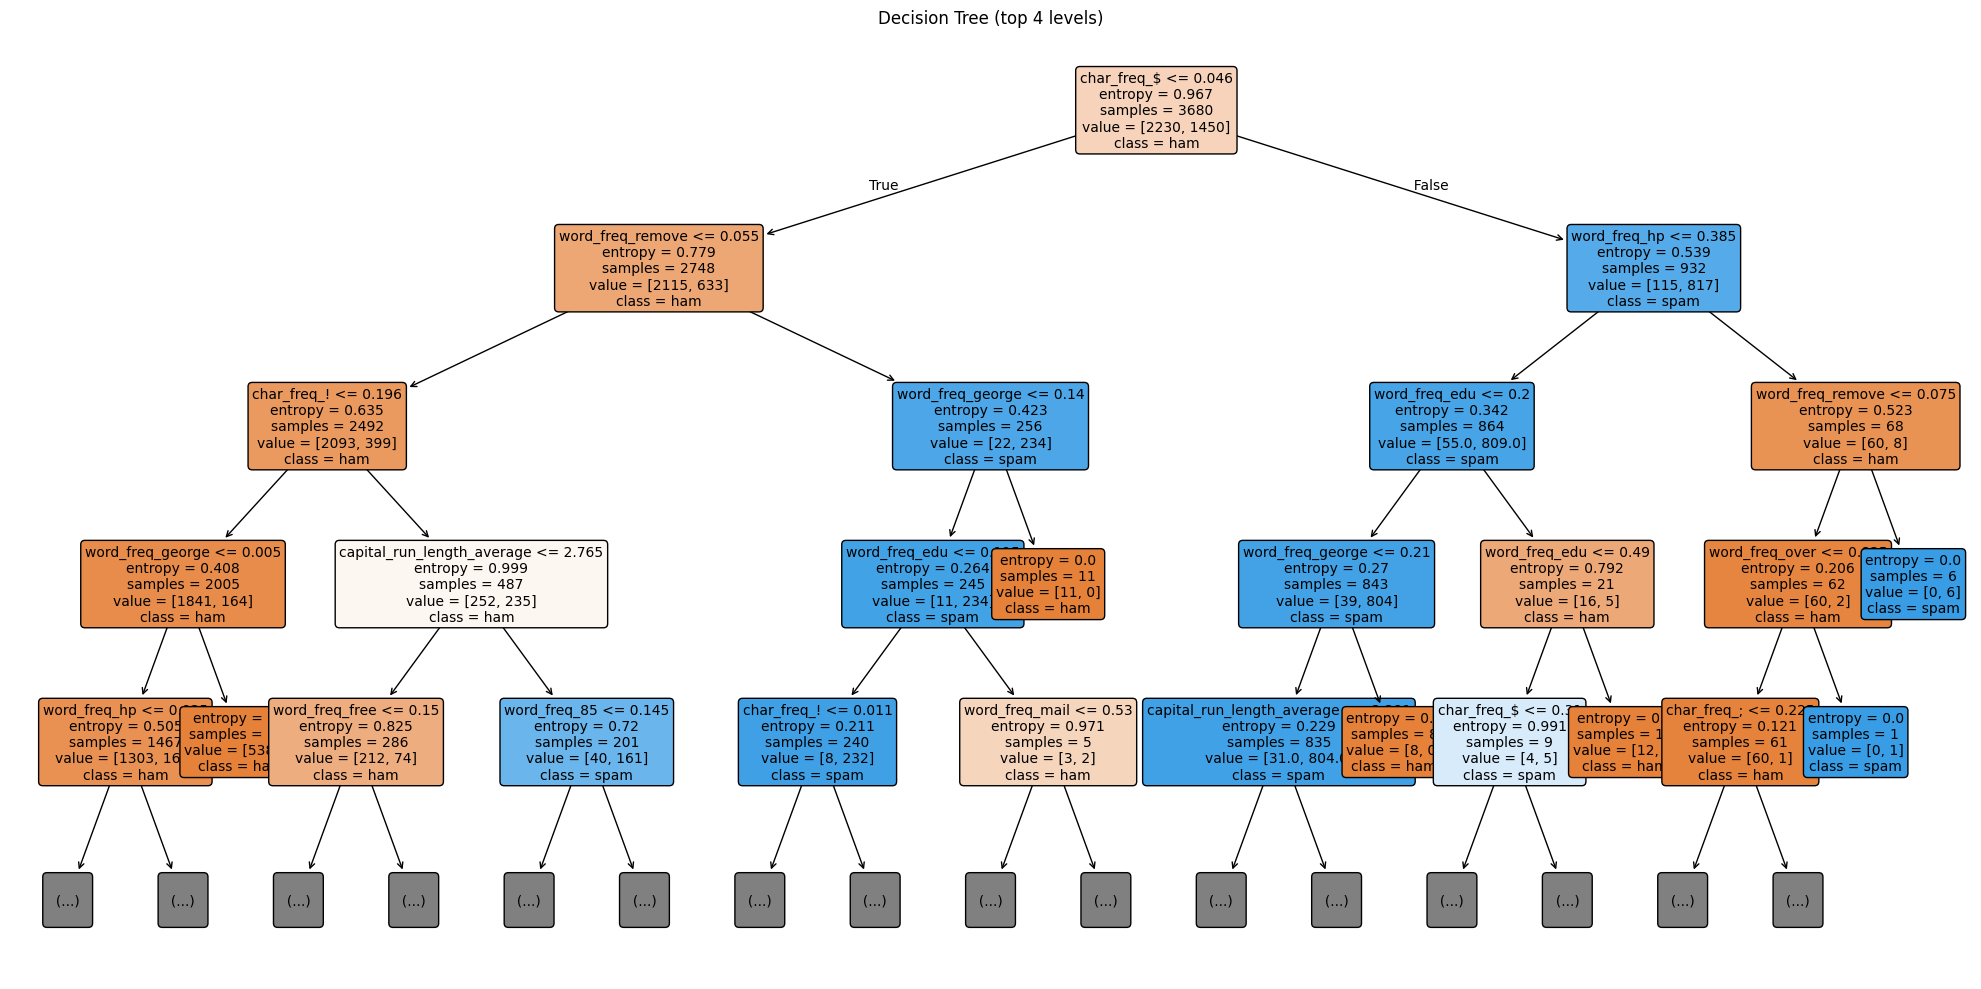

Saved: /content/decision_tree_top_levels.png


<Figure size 640x480 with 0 Axes>

In [20]:
# A: plot top levels of the tree (fast & readable)
# import matplotlib.pyplot as plt
# from sklearn import tree

# replace best_model, X_train with the ones from your Colab session
# choose max_levels to control how much of the tree to show (3-5 is usually readable)
max_levels = 4

plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["ham", "spam"],
    filled=True,
    rounded=True,
    max_depth=max_levels,
    fontsize=10
)
plt.title(f"Decision Tree (top {max_levels} levels)")
plt.tight_layout()
plt.show()

# Save image
plt.savefig('/content/decision_tree_top_levels.png', dpi=200, bbox_inches='tight')
print("Saved: /content/decision_tree_top_levels.png")


### B — Full-tree export with Graphviz (high-quality PNG/SVG/PDF)

This gives a high-res rendering of the entire tree. It can be large for depth=11, so be prepared to open the file in a viewer.

* If the PNG is huge, open /content/tree_full.svg (vector) — zoom without loss.

* If graph_from_dot_data errors, try !pip install --upgrade pydotplus then re-run.

In [21]:
!apt-get -qq install -y graphviz
!pip -q install graphviz pydotplus

Saved: /content/tree_full.png


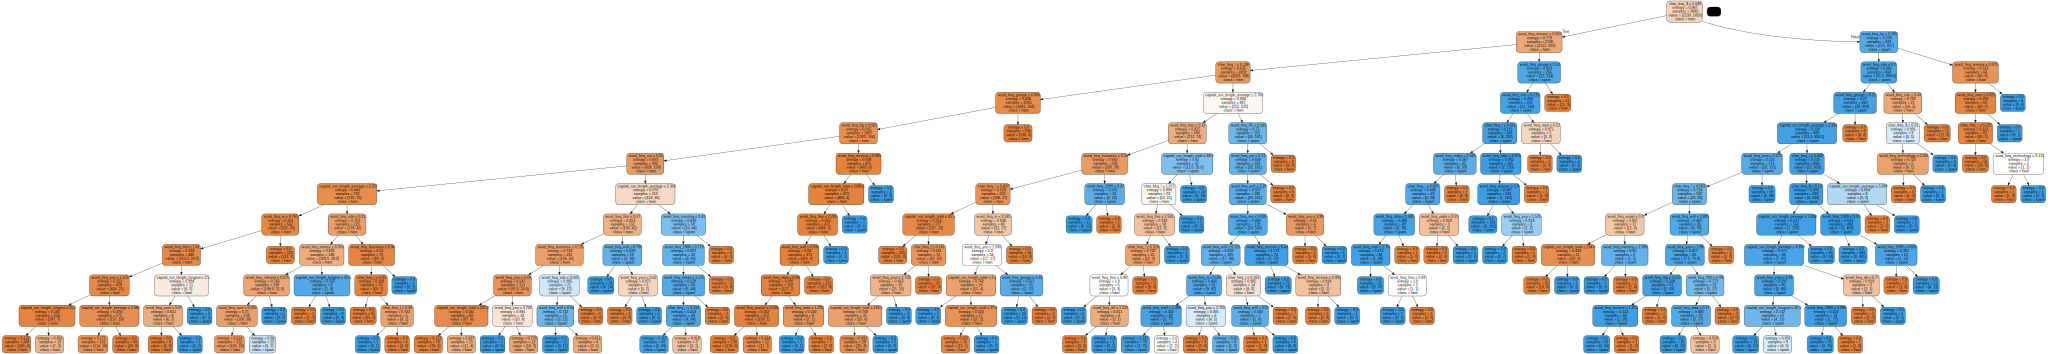

In [22]:
# B: export full tree with graphviz (high-quality)
# Install prerequisites (run once in Colab)
# !apt-get -qq install -y graphviz
# !pip -q install graphviz pydotplus

# from sklearn import tree
# import pydotplus
# from IPython.display import Image, SVG
# from sklearn.tree import export_graphviz
# import os

# Paths
dot_path = "/content/tree.dot"
png_path = "/content/tree_full.png"
svg_path = "/content/tree_full.svg"

# Export to DOT data
dot_data = export_graphviz(
    best_model,
    out_file=None,
    feature_names=list(X.columns),
    class_names=["ham", "spam"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Create graph (pydotplus)
graph = pydotplus.graph_from_dot_data(dot_data)

# Save outputs
graph.write_png(png_path)
graph.write_svg(svg_path)

# Display (SVG is usually nicer in Colab)
print("Saved:", png_path)
display(SVG(svg_path))

### C — Human-readable textual rules (compact)

If the visual is too big, a textual tree (rules) is compact and useful.

You can search this text for the most important features you found earlier (char_freq_$, word_freq_remove, etc.) to see exact split thresholds.

In [23]:
from sklearn.tree import export_text
r = export_text(best_model, feature_names=list(X.columns))
print(r[:4000])   # print the first 4000 chars; increase if you want the whole tree

|--- char_freq_$ <= 0.05
|   |--- word_freq_remove <= 0.05
|   |   |--- char_freq_! <= 0.20
|   |   |   |--- word_freq_george <= 0.00
|   |   |   |   |--- word_freq_hp <= 0.02
|   |   |   |   |   |--- word_freq_our <= 0.01
|   |   |   |   |   |   |--- capital_run_length_average <= 2.26
|   |   |   |   |   |   |   |--- word_freq_re <= 0.76
|   |   |   |   |   |   |   |   |--- word_freq_free <= 1.41
|   |   |   |   |   |   |   |   |   |--- word_freq_you <= 1.11
|   |   |   |   |   |   |   |   |   |   |--- capital_run_length_longest <= 15.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- capital_run_length_longest >  15.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- word_freq_you >  1.11
|   |   |   |   |   |   |   |   |   |   |--- capital_run_length_average <= 1.68
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- capital_run_

## Phase 7: Cross-Validation & Model Stability Check.

This is where your Decision Tree goes from “good” → reliable.

A single train/test split is not enough to judge a model.
Cross-validation checks:
* Does the model perform consistently across different splits?
* Is your accuracy stable or lucky?
* Are you overfitting or underfitting across folds?
* How much variance does your model have?

This is what real ML engineers do before deployment.

**Phase 7 — Goal**

Evaluate the tuned Decision Tree using K-fold cross-validation.

We’ll:
* Cross-validate with 5-fold and 10-fold
* Compare average accuracy
* Compare variance across folds
* Analyze whether the model is stable or noisy
* Decide if you need ensembling.

No tuning here — just evaluation.

### Step 1: 5-Fold Cross Validation
This gives us:

* accuracy for 5 different splits
* average accuracy
* stability (std dev)

**Low standard deviation ⇒ model is stable.**

In [24]:
# from sklearn.model import cross_val_score

cv_score_5 = cross_val_score(
    best_model,
    X,
    y,
    cv=5,
    scoring='accuracy'
)

print(f"5-Fold CV Scores: {cv_score_5}")
print(f"Mean Accuracy: {cv_score_5.mean()}")
print(f"Std Dev: {cv_score_5.std()}")

5-Fold CV Scores: [0.90652174 0.90652174 0.91956522 0.92717391 0.78152174]
Mean Accuracy: 0.8882608695652173
Std Dev: 0.05395247506108865


### Step 2: 10-Fold Cross Validation

In [25]:
cv_score_10 = cross_val_score(
    best_model,
    X,
    y,
    cv=10,
    scoring="accuracy"
)

print(f"10-Fold CV Scores: {cv_score_10}")
print(f"Mean Accuracy: {cv_score_10.mean()}")
print(f"Std Dev: {cv_score_10.std()}")

10-Fold CV Scores: [0.95434783 0.91086957 0.92173913 0.92391304 0.93478261 0.94130435
 0.9326087  0.94130435 0.88043478 0.86521739]
Mean Accuracy: 0.9206521739130435
Std Dev: 0.026700219125004417


#### 🎯 **Phase 7 — Cross-Validation Interpretation**

##### **5-Fold CV Results**

```
Scores: [0.9065, 0.9065, 0.9195, 0.9271, 0.7815]
Mean: 0.8882
Std: 0.0539
```

**The good:**

* 3 out of 5 folds are in the **~91–92% range** → consistent with your test accuracy.

**The issue:**

* One fold (0.7815) is **far below the others** → this is a sign of:

  * a “hard” fold (data slice much different than the rest)
  * or the model being **unstable on certain subsets**

This is normal for single Decision Trees (they are high-variance models).

**Conclusion:**
5-fold CV shows **high variance** because Decision Trees are sensitive to small changes in the data.

---

##### **10-Fold CV Results**

```
Scores: [0.9543, 0.9108, 0.9217, 0.9239, 0.9347, 0.9413,
         0.9326, 0.9413, 0.8804, 0.8652]

Mean: 0.9206
Std: 0.0267
```

**Why this is better:**

* Mean = **92.06%**, which matches your test accuracy (~93%)
* Std dev = **2.6%**, which is decent
* No extreme outliers (lowest is ~86%)

This means your Decision Tree is:

* **reasonably stable**
* performs well across splits
* variance is manageable

But note something important:

* 5-fold had a huge drop in one fold (~78%)
* 10-fold shows the **true average performance** (~92%)

This is classic Decision Tree behavior.

---

# 🏆 **Final Conclusion of Phase 7**

Your tuned Decision Tree is:

* **Accurate** (92–93%)
* **Interpretable**
* **Fairly stable** (10-fold variance is small)
* **Still a high-variance model by nature**

This brings us to the next natural step.

---
Phase 8 will be commenced after I master **RandomForest**